# 5.1交叉验证

交叉验证是一种评估泛化性能的统计学方法，它比单次划分训练集和测试集的方法更加稳定全面。数据被多次划分，并且需要训练多个模型，最常用的是k折交叉验证

# 5.1.1sklearn中的交叉验证

sklearn是利用model_selection模块中的cross_val_score函数来实现交叉验证的。主要参数包含estimator，x，y，cv

In [5]:
import warnings;warnings.simplefilter('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris=load_iris()
lr=LogisticRegression()
scores=cross_val_score(lr,iris.data,iris.target,cv=5)
print(scores)
print(scores.mean())

[1.         0.96666667 0.93333333 0.9        1.        ]
0.9600000000000002


我们可以发现，折与折之间的精度有较大的变化，范围从100%-90%，这可能意味着模型强烈依赖于将某个折用于训练，也有可能是因为数据集的数据量太小

# 5.1.2交叉验证的优点

# 5.1.3分层k折交叉验证和其他策略

In [27]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

如果在这一数据集上进行3折交叉验证，3折交叉验证精度为0，由于简单的k折策略在这里失效了，所以sklearn在分类问题不使用这种策略，而是使用分层k折交叉验证，使得每个折中类别之间的比例与整个数据集中的比例相同

使用分层k折交叉验证而不是k折交叉验证来评估一个分类器，通常是一个好主意。
对于回归问题，sklearn默认使用标准k折交叉验证

5.1.3.1对交叉验证的更多控制

回归问题默认的k折交叉验证与分类问题的分层k折交叉验证的表现都很好，但有些情况下你可能希望使用不同的策略。
比如我们想要在分类数据集上使用标准k折交叉验证，我们就要导入KFold分离器类

In [5]:
from sklearn.model_selection import KFold
kfold=KFold(n_splits=5)
scores=cross_val_score(lr,iris.data,iris.target,cv=kfold)
scores

array([1.        , 0.93333333, 0.43333333, 0.96666667, 0.43333333])

In [6]:
kfold=KFold(n_splits=3)
scores=cross_val_score(lr,iris.data,iris.target,cv=kfold)
scores

array([0., 0., 0.])

在iris数据集上使用3折交叉验证（不分层）确实是一个非常糟糕的主意。
可以通过KFold的shuffle参数来实现打乱来代替分层，还需要固定random_state以获得可以重复的打乱结果。

In [14]:
kfold=KFold(n_splits=3,shuffle=True,random_state=0)
scores=cross_val_score(lr,iris.data,iris.target,cv=kfold)
scores

array([0.9 , 0.96, 0.96])

5.1.3.2留一法交叉验证

每折只包含单个样本的k折交叉验证，对于每次划分，选择单个数据点作为测试集，对于大型数据集太耗时。

In [6]:
from sklearn.model_selection import LeaveOneOut
loo=LeaveOneOut()
scores=cross_val_score(lr,iris.data,iris.target,cv=loo)
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [7]:
scores.mean()

0.9533333333333334

5.1.3.3打乱划分交叉验证

每次划分为训练集取样train_size个点，为测试集取样test_size个（不相交）点，将这一方法重复n_iter次


In [8]:
from sklearn.model_selection import ShuffleSplit
ss=ShuffleSplit(n_splits=10, random_state=0, test_size=0.5, train_size=0.5)
scores=cross_val_score(lr,iris.data,iris.target,cv=ss)
scores

array([0.84      , 0.93333333, 0.90666667, 1.        , 0.90666667,
       0.93333333, 0.94666667, 1.        , 0.90666667, 0.88      ])

能独立控制迭代次数，还允许使用部分数据，在大型数据上很有帮助，shufflesplit还有一种分层形式，stratifiedshufflesplit，它可以为分类任务提供更可靠的结果。

5.1.3.4分组交叉验证

对于分类其而言，检测训练集中出现过的人脸感情比全新的人脸要容易得多。因此为了准确评估模型对新的人脸的泛化能力，我们必须确保训练集和测试集中包含不同人的图像。
为了实现这一点，我们可以使用GroupKFold,它以group数组作为参数，可以用来说明照片中对应的是那个人

数据分组的这种例子常见于医疗应用，你可能拥有来自同一名病人的多个样本，但想要将其泛化到新的病人。同样在语音识别领域，你的数据集中可能包含同一名发言人的多条记录，但你希望能识别新的发言人的讲话。

# 5.2网格搜索

学习如何通过调参来提升模型的泛化能力，sklearn中有一些标准方法可以帮你完成，最常用的方法就是网格搜索(grid search)

# 5.2.1简单网格搜索

我们可以实现一个简单的网格搜索，在2个参数上使用for循环，对每种参数组合分别训练并评估一个分类器。

In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=0)
best_score=0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for c in [0.001,0.01,0.1,1,10,100]:
        svm=SVC(gamma=gamma,C=c)
        svm.fit(x_train,y_train)
        score=svm.score(x_test,y_test)
        if score>best_score:
            best_score=score
            best_parameter={'c':c,'gamma':gamma}
        else:
            pass
print(best_score)
print(best_parameter)

0.9736842105263158
{'c': 100, 'gamma': 0.001}


# 5.2.2参数过拟合的风险与验证集

由于我们使用测试数据进行调参，所以不能再用它来评估模型的好坏。我们需要一个独立的数据集来进行评估，一个在创建模型时没有用到的数据集

我们需要重新划分数据，我们得到3个数据集：用于构建模型的训练集，用于选择模型参数的验证集（开发集），用于评估所选参数性能的测试集。利用验证集选定最佳参数后，我们可以利用我们找到的参数设置重新构建一个模型，但是要同时在训练数据和验证数据上进行训练。

In [19]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
iris=load_iris()
from sklearn.model_selection import train_test_split
#将数据分为训练+验证集和测试集
x_trainval, x_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
#将数据分为训练和验证集
x_train,x_valid,y_train,y_valid= train_test_split(x_trainval, y_trainval, random_state=1)
best_score=0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for c in [0.001,0.01,0.1,1,10,100]:
        svm=SVC(gamma=gamma,C=c)
        svm.fit(x_train,y_train)
        score=svm.score(x_valid,y_valid)
        if score>best_score:
            best_score=score
            best_parameter={'c':c,'gamma':gamma}
        else:
            pass
print(best_score)
print(best_parameter)

0.9642857142857143
{'c': 10, 'gamma': 0.001}


In [20]:
#在训练+验证集上重新构建一个模型，并在测试集上进行评估
svm=SVC(gamma=0.001,C=10)
svm.fit(x_trainval,y_trainval)
score=svm.score(x_test,y_test)
score

0.9210526315789473

任何根据测试集精度所做的选择都会将测试集信息泄露到模型中，因此保留一个单独的测试集很有必要

# 5.2.3带交叉验证的网格搜索

In [35]:
best_score=0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for c in [0.001,0.01,0.1,1,10,100]:
        svm=SVC(gamma=gamma,C=c)
        
        scores=cross_val_score(svm,x_trainval,y_trainval,cv=5)
        score=scores.mean()
        if score>best_score:
            best_score=score
            best_parameter={'c':c,'gamma':gamma}
print(best_score)
print(best_parameter)

0.9726896292113683
{'c': 100, 'gamma': 0.01}


In [36]:
svm=SVC(gamma=0.01,C=100)
svm.fit(x_trainval,y_trainval)
svm.score(x_test,y_test)

0.9736842105263158

为了得到对泛化性能更好的估计，我们可以使用交叉验证来评估每种参数组合的性能，而不是仅将数据单次划分为训练集与验证集

由于带交叉验证的网格搜索是一种常见的调参方法，因此sklearn提供了GridSearchCV类

In [4]:
param_grid={'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100]}
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.svm import SVC
grid_search=GridSearchCV(SVC(),param_grid,cv=5)
x_trainval, x_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
grid_search.fit(x_trainval,y_trainval)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

为了评估找到的最佳参数的泛化能力，我们可以在测试集上调用score

In [8]:
grid_search.score(x_test,y_test)

0.9736842105263158

利用交叉验证选择参数，我们实际上找到了一个测试集上精度为97%的模型。重要的是，我们没有使用测试集来选择参数。我们找到的参数保存在best_params_中，而交叉验证的最佳精度保存在best_scores中，best_estimator_可以访问最佳模参数对应的模型

In [5]:
grid_search.best_score_

0.9732142857142857

In [6]:
grid_search.best_params_

{'C': 100, 'gamma': 0.01}

In [7]:
grid_search.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# 5.2.3.1分析交叉验证结果

In [9]:
import pandas as pd
results=pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.0008,4.000664e-04,0.0006,4.899792e-04,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.375000,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,22
1,0.0008,4.001141e-04,0.0002,4.000664e-04,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.375000,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,22
2,0.0006,4.899792e-04,0.0004,4.900376e-04,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.375000,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,22
3,0.0008,4.000664e-04,0.0002,4.000664e-04,0.001,1,"{'C': 0.001, 'gamma': 1}",0.375000,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,22
4,0.0010,0.000000e+00,0.0004,4.899792e-04,0.001,10,"{'C': 0.001, 'gamma': 10}",0.375000,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,22
5,0.0012,4.000187e-04,0.0010,9.536743e-08,0.001,100,"{'C': 0.001, 'gamma': 100}",0.375000,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,22
6,0.0008,4.000664e-04,0.0006,4.900182e-04,0.01,0.001,"{'C': 0.01, 'gamma': 0.001}",0.375000,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,22
7,0.0010,0.000000e+00,0.0000,0.000000e+00,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",0.375000,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,22
8,0.0008,4.000902e-04,0.0002,4.000664e-04,0.01,0.1,"{'C': 0.01, 'gamma': 0.1}",0.375000,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,22
9,0.0006,4.899792e-04,0.0002,4.000664e-04,0.01,1,"{'C': 0.01, 'gamma': 1}",0.375000,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,22


In [10]:
results[results.rank_test_score==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
31,0.0006,0.00049,0.0,0.0,100,0.01,"{'C': 100, 'gamma': 0.01}",1.0,0.956522,1.0,0.954545,0.952381,0.973214,0.0224,1


In [43]:
import numpy as np
scores=np.array(results.mean_test_score).reshape(6,6)
scores

array([[0.36607143, 0.36607143, 0.36607143, 0.36607143, 0.36607143,
        0.36607143],
       [0.36607143, 0.36607143, 0.36607143, 0.36607143, 0.36607143,
        0.36607143],
       [0.36607143, 0.69642857, 0.91964286, 0.95535714, 0.36607143,
        0.36607143],
       [0.69642857, 0.92857143, 0.96428571, 0.94642857, 0.91964286,
        0.50892857],
       [0.92857143, 0.96428571, 0.96428571, 0.9375    , 0.91964286,
        0.57142857],
       [0.96428571, 0.97321429, 0.95535714, 0.94642857, 0.91964286,
        0.57142857]])

In [56]:
scores=pd.DataFrame(scores)
scores.columns=param_grid['gamma']
scores.index=param_grid['C']
scores

,0.001,0.01,0.1,1.0,10.0,100.0
0.001,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071
0.010,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071
0.100,0.366071,0.696429,0.919643,0.955357,0.366071,0.366071
1.000,0.696429,0.928571,0.964286,0.946429,0.919643,0.508929
10.000,0.928571,0.964286,0.964286,0.937500,0.919643,0.571429
100.000,0.964286,0.973214,0.955357,0.946429,0.919643,0.571429


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]), <a list of 6 Text yticklabel objects>)

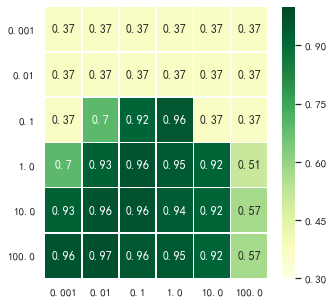

In [67]:
import matplotlib.pyplot as plt
>>> import numpy as np; np.random.seed(0)
>>> import seaborn as sns; sns.set()
plt.rcParams['font.sans-serif'] = ['SimHei']  # 解决中文显示问题-设置字体为黑体
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize']=[5,5]#设置图像尺寸
plt.xlabel='gamma'
plt.ylabel='C'
import pandas as pd
pd.set_option('display.float_format',lambda x : '%.2f' % x)
g=sns.heatmap(scores,vmin=0.3, vmax=1,cmap="YlGn",annot=True,linewidths=.5)
plt.yticks(rotation=360)

# 5.2.3.2在非网格的空间中搜索

在某些情况下，尝试参数的所有可能组合并不是一个好主意，SVC有一个kernel参数，如果kernel是linear，只会用到C参数，如果kernel是rbf，则需要使用gamma和C两个参数，这种情况下网格搜索就会浪费时间，此时可以字典组成列表

In [2]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search=GridSearchCV(SVC(),param_grid,cv=5)
x_trainval, x_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
grid_search.fit(x_trainval,y_trainval)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.9732142857142857


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [5]:
import pandas as pd
results=pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.0018,4.000902e-04,0.0002,0.00040,0.001,0.001,rbf,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",0.375000,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,27
1,0.0012,7.484557e-04,0.0004,0.00049,0.001,0.01,rbf,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}",0.375000,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,27
2,0.0008,4.000902e-04,0.0002,0.00040,0.001,0.1,rbf,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}",0.375000,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,27
3,0.0008,4.001141e-04,0.0002,0.00040,0.001,1,rbf,"{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}",0.375000,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,27
4,0.0012,4.000664e-04,0.0002,0.00040,0.001,10,rbf,"{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}",0.375000,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,27
5,0.0010,9.536743e-08,0.0002,0.00040,0.001,100,rbf,"{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}",0.375000,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,27
6,0.0008,4.000902e-04,0.0002,0.00040,0.01,0.001,rbf,"{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}",0.375000,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,27
7,0.0006,4.899792e-04,0.0006,0.00049,0.01,0.01,rbf,"{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}",0.375000,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,27
8,0.0008,4.000664e-04,0.0002,0.00040,0.01,0.1,rbf,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}",0.375000,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,27
9,0.0008,4.000902e-04,0.0002,0.00040,0.01,1,rbf,"{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",0.375000,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,27


In [6]:
results[results['rank_test_score']==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
31,0.0002,0.0004,0.0000,0.0000,100,0.01,rbf,"{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}",1.0,0.956522,1.0,0.954545,0.952381,0.973214,0.0224,1
39,0.0000,0.0000,0.0008,0.0004,1,NaN,linear,"{'C': 1, 'kernel': 'linear'}",1.0,0.956522,1.0,0.954545,0.952381,0.973214,0.0224,1


# 5.2.3.3使用不同的交叉验证策略进行网格搜索

与cross_val_score类似，gridsearchcv对分类问题默认分层k折交叉验证，对回归问题默认使用k折交叉验证。实际可以传入任何交叉验证分离器作为gridsearchcv的cv参数。如果只想将数据单次划分为训练集和验证集，你可以使用shufflesplit和stratefiedshufflesplit，设置n_splits=1,这对于非常大的数据或非常慢的模型有帮助

# 5.3评估指标与评分

# 5.3.1牢记最终目标

在选择模型或调参时，应该选择对商业指标具有最大正面影响的模型或参数值。

# 5.3.2二分类指标

对于2分类问题，我们通常会说正类(positive class)和反类(negative class),正类是我们要寻找的类

错误的正类预测叫做假正例，错误的反类预测叫做假反例，假正例和假反例造成的结果很少相同，所以精度并不能很好地度量预测性能

2.不平衡数据集 如果在两个类别中，一个类别出现的次数比另一个多很多，那么错误类型将发挥重要作用

In [45]:
import warnings;warnings.simplefilter('ignore')
from sklearn.datasets import load_digits
digits=load_digits()
y=digits.target==9
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

In [47]:
#1 始终预测多数类，我们得到了接近90%的精度却没有学到任何内容。
from sklearn.dummy import DummyClassifier
dummymajor=DummyClassifier(strategy='most_frequent').fit(x_train,y_train)
pred_mostfrequent=dummymajor.predict(x_test)
dummymajor.score(x_test,y_test)

0.8955555555555555

In [48]:
#2
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(max_depth=2).fit(x_train,y_train)
pred_tree=tree.predict(x_test)
tree.score(x_test,y_test)

0.9177777777777778

In [51]:
#3
dummy=DummyClassifier().fit(x_train,y_train)
pred_dummy=dummy.predict(x_test)
dummy.score(x_test,y_test)

0.7933333333333333

In [52]:
#4
import warnings;warnings.simplefilter('ignore')
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=0.1).fit(x_train,y_train)
pred_lr=lr.predict(x_test)
lr.score(x_test,y_test)

0.9777777777777777

这里的问题在于，要想对这种不平衡数据的预测性能进行量化，精度并不是一种合适的度量

3.混淆矩阵
对于二分类问题的评估结果，一种最全面的表示方法是使用混淆矩阵confusion matrix

In [17]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,pred_lr)
confusion

array([[401,   2],
       [  8,  39]], dtype=int64)

其中行对应于真实的类别，列对应于预测的类别

In [18]:
print("mostfrquent:")
print(confusion_matrix(y_test,pred_mostfrequent))
print('dummy:')
print(confusion_matrix(y_test,pred_dummy))
print("tree:")
print(confusion_matrix(y_test,pred_tree))
print("lr:")
print(confusion)

mostfrquent:
[[403   0]
 [ 47   0]]
dummy:
[[361  42]
 [ 43   4]]
tree:
[[390  13]
 [ 24  23]]
lr:
[[401   2]
 [  8  39]]


mostfrequent全部预测反例，根本不预测正例。
dummy假正例比真正例还多，正例预测不理想。
tree和lr预测比较合理，但tree在正例预测结果还是不理想。

准确率，召回率，f分数

In [20]:
#准确率：度量的是被预测为正例的样本中有多少是真正的正例 precision=tp/(tp+fp) 限制假正例数量
#召回率：度量的是正例的样本中有多少被预测为正例 recall=tp/(tp+fn) 避免假反例
#f分数/f度量：准确率和召回率的调和平均 它对于不平衡的二分类数据集来说是一种比精度更好的度量 
#f=2*precision*recall/（precision+recall）
from sklearn.metrics import f1_score
print("most frequent:"+str(f1_score(y_test,pred_mostfrequent)))
print("dummy:"+str(f1_score(y_test,pred_dummy)))
print("tree:"+str(f1_score(y_test,pred_tree)))
print("lr:"+str(f1_score(y_test,pred_lr)))

most frequent:0.0
dummy:0.08602150537634408
tree:0.5542168674698795
lr:0.8863636363636364


f分数比精度更加符合我们对好模型的直觉，然而f分数的一个缺点是比精度更加难以解释

In [49]:
#classification_report可以对准确率，召回率，f分数做一个全面的总结
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_mostfrequent,target_names=["not nine","nine"]))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



In [53]:
print(classification_report(y_test,pred_dummy,target_names=["not nine","nine"]))
print(classification_report(y_test,pred_lr,target_names=["not nine","nine"]))

              precision    recall  f1-score   support

    not nine       0.90      0.90      0.90       403
        nine       0.13      0.13      0.13        47

    accuracy                           0.82       450
   macro avg       0.51      0.51      0.51       450
weighted avg       0.82      0.82      0.82       450

              precision    recall  f1-score   support

    not nine       0.98      1.00      0.99       403
        nine       0.95      0.83      0.89        47

    accuracy                           0.98       450
   macro avg       0.97      0.91      0.94       450
weighted avg       0.98      0.98      0.98       450



选择哪个指标作为正类对指标有很大影响，不过同时查看所有数字可以给出非常准确的图像，我们可以清楚地看到logistic回归模型的优势

4.考虑不确定性
大多数分类其提供了一个decision function或predict proba方法来评估预测的不确定度，在二分类问题中我们使用0作为决策函数的阀值，0.5作为predict proba阀值

默认情况下，decision function值大于0的点将被划为类别1，如果我们希望将更多的点划为类别1，需要减小阀值

In [88]:
X, y = make_blobs(n_samples=(400, 50), centers=None,cluster_std=[7.0, 2],random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

In [89]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



假设在我们的应用中，类别1具有高召回率更加重要，我们可以减小阀值

In [91]:
y_pred_lower_threshold=svc.decision_function(X_test)>-0.8
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



由于decision function的取值可能在任意范围内，所以很难提供关于如何选取阀值的经验法则

对于实现了predict_proba方法的模型来说，选择阀值可能更简单，因为predict proba的输出固定在0-1之间

5.准确率-召回率曲线
对于分类器设置要求（比如90%的召回率）通常被称为设置工作点，同时查看所有可能的阀值或准确率和召回率的所有可能折中。利用一种准确率-召回率曲线（precision-recall curve）的工具可以做到这一点

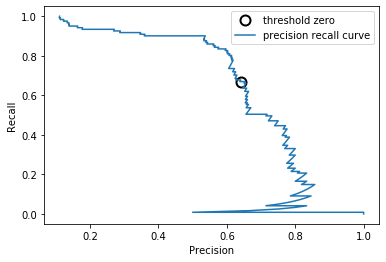

In [62]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
svc=SVC()
from sklearn.datasets import make_blobs
# Use more data points for a smoother curve
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))


# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

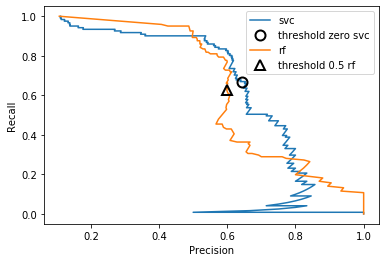

In [65]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
    y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label="svc")

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero svc", fillstyle="none", c='k', mew=2)

plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
         markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

曲线越靠近右上角，则分类其越好。随着准确率升高，模型能够保持较高的召回率则模型越好

precision_recall_curve函数返回一个列表，包含按顺序排序的所有可能阀值对应的准确率和召回率，不同的分类器可能在曲线上不同的位置表现很好。如果我们只看f分数来比较两者的总体性能，那么可能会遗漏这些细节，因为f分数只反映了准确率-召回率曲线上的一个点，即默认阀值对应的那个点。

随机森林在极值处的表现更好，在中间位置svm表现更好

总结准确率-召回率曲线的一种方法是计算该曲线下的积分或面积，也叫做平均准确率，可以用average_precision_score函数来计算平均准确率

In [68]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print(ap_rf,ap_svc)

0.659559370099291 0.6663140319391998


6.受试者工作特征ROC，它显示的是假正例率和真正例率，真正例率是召回率的另一个名称，假正例率是假正例占所有反类样本的比例FPR=FP/(FP+TN),可以用roc_curve函数来计算ROC曲线。对于roc曲线，理想的曲线是要靠近左上角，你希望分类其的召回率很高，同时保持假正例率很低。同样可以利用roc_auc_score函数来计算ROC曲线下的面积。

AUC可以被解释为评估正例样本的排名，它等价于从正类样本中随机挑选一个点，由分类器给出的分数比从反类样本中随机挑选一个点的分数更高的概率。对于不平衡类别的分类的问题auc比精度更加有意义，但auc没有使用默认阀值，为了从高auc的模型中取得有用的分类结果，需要调节决策阀值

# 5.3.3多分类指标

In [6]:
#除了精度，常用的工具有混淆矩阵和分类报告
from sklearn.datasets import load_digits
digits=load_digits()
import warnings;warnings.simplefilter('ignore')
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression().fit(x_train,y_train)
pred_lr=lr.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,pred_lr)
print(lr.score(x_test,y_test))
print(confusion)

0.9533333333333334
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


In [7]:
#利用classification_report函数，我们可以计算每个类别的准确率，召回率和f分数
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.91      0.90        43
           2       0.95      0.93      0.94        44
           3       0.90      0.96      0.92        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       0.96      1.00      0.98        52
           7       1.00      0.94      0.97        48
           8       0.93      0.90      0.91        48
           9       0.96      0.94      0.95        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



5.3.4回归指标
R-Squared

5.3.5在模型选择中使用评估指标

In [11]:
#分类问题的默认评分时精度
import warnings;warnings.simplefilter('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
svc=SVC()
print(cross_val_score(svc,digits.data,digits.target==9))

[0.89983306 0.89983306 0.89983306]


In [13]:
#分数默认值修改为auc
print(cross_val_score(svc,digits.data,digits.target==9,scoring='roc_auc'))

[0.99372294 0.98957947 0.99594929]


In [14]:
from sklearn.metrics.scorer import SCORERS
SCORERS.keys()
#scoring所有参数

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target==9, random_state=0)
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
#使用默认的精度
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(x_train, y_train)
print("Grid-Search with accuracy")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (accuracy)): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(roc_auc_score(y_test, grid.decision_function(x_test))))
print("Test set accuracy: {:.3f}".format(grid.score(x_test, y_test)))

Grid-Search with accuracy
Best parameters: {'gamma': 0.0001}
Best cross-validation score (accuracy)): 0.970
Test set AUC: 0.992
Test set accuracy: 0.973


In [20]:
#使用auc评分来代替
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="roc_auc")
grid.fit(x_train, y_train)
print("\nGrid-Search with AUC")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (AUC): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(roc_auc_score(y_test, grid.decision_function(x_test))))
print("Test set accuracy: {:.3f}".format(grid.score(x_test, y_test)))


Grid-Search with AUC
Best parameters: {'gamma': 0.01}
Best cross-validation score (AUC): 0.997
Test set AUC: 1.000
Test set accuracy: 1.000
